In [1]:
#Set-ExecutionPolicy -Scope Process -ExecutionPolicy RemoteSigned
#Get-ExecutionPolicy

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
#Entrenamiento
print(f"Forma de los arrays x: {x_train.shape}") # (60000, 28, 28)
print(f"Forma de los arrays y: {y_train.shape}") # (60000,)

#Pruebas
print(f"Forma de los arrays x: {x_test.shape}") # (10000, 28, 28)
print(f"Forma de los arrays y: {y_test.shape}") # (10000,)

Forma de los arrays x: (60000, 28, 28)
Forma de los arrays y: (60000,)
Forma de los arrays x: (10000, 28, 28)
Forma de los arrays y: (10000,)


In [5]:
#Normalizar datos
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
#Creacion del modelo
modelo = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])

#Compilamos el modelo

modelo.compile(
    optimizer = "adam",
    loss='sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

#Entrenamiento de el modelo
modelo.fit(x_train,y_train,epochs = 5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8787 - loss: 0.4293
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9652 - loss: 0.1194
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9757 - loss: 0.0799
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9830 - loss: 0.0560
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9867 - loss: 0.0430


In [7]:
#evaluar el modelo

test_loss, test_acc = modelo.evaluate(x_test,y_test)
print(f"Test accuracy {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9683 - loss: 0.1038
Test accuracy 0.972599983215332


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


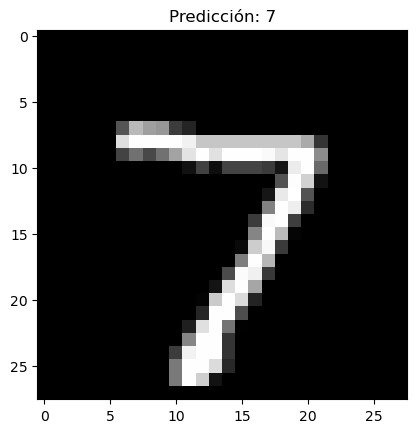

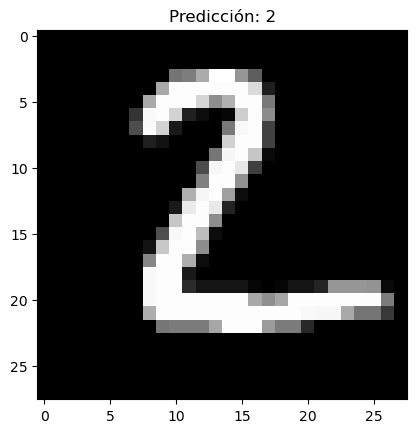

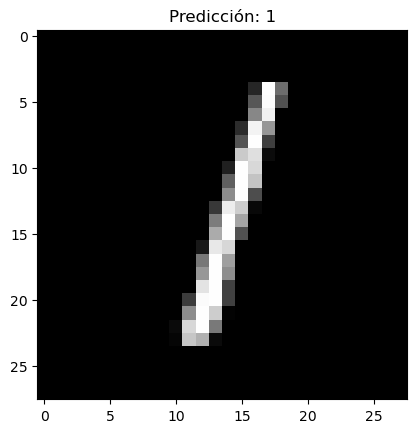

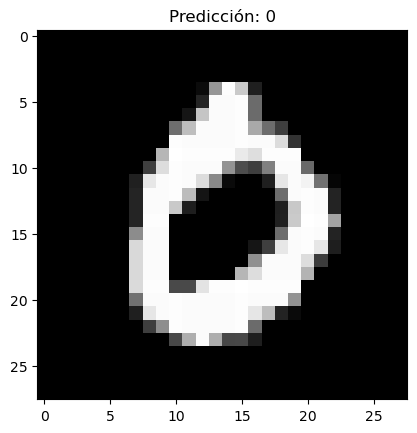

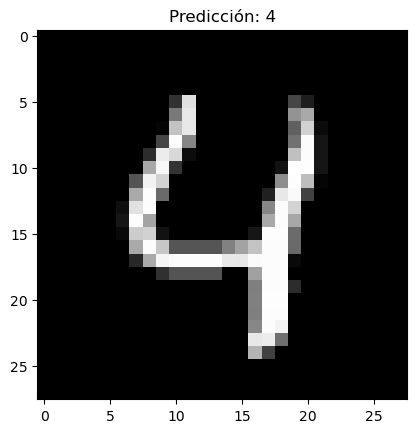

In [13]:
predicciones = modelo.predict(x_test)

# Mostrar los primeros 5 dígitos y sus predicciones
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicción: {np.argmax(predicciones[i])}")
    plt.show()
